<a href="https://colab.research.google.com/github/Advanced-Data-Science-TU-Berlin/Part-2/blob/main/notebooks/2_1_visualization_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Vaccines Analysis
Many vaccines have been introduced so far to fight covid-19. No vaccine has guaranteed 100% accuracy so far, but most manufacturing companies claim their vaccine is not 100% accurate, but still, it will save your life by giving you immunity.

Thus, each country tries to vaccinate a large part of its population so as not to depend on a single vaccine. That’s what we are going to analyze in this exercise, which is how many vaccines each country is using to fight covid-19. 

We used the data from [here](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress). Feel free to navigate through data and its columns.
Let's get the data first.

In [ ]:
!pip install opendatasets
!pip install wordcloud

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahnaznmz
Your Kaggle Key: ··········


100%|██████████| 1.94M/1.94M [00:00<00:00, 41.4MB/s]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
% matplotlib inline

df = pd.read_csv("/content/covid-world-vaccination-progress/country_vaccinations.csv")
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


As we can see te dataset has columns like country, iso_code, date, total_vaccinations, people_vaccinated, people_fully vaccinated, etc. An initial look at the above table shows that data has null values too. We will deal with null values later.
When we have so many columns usually info() function is used to get the overview of data like data type of feature, a number of null values in each column, and many more.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

The above results shows that there are many null values in our dataset which we are going to deal with these null values later. There are two data types as seen from the table object means string and float.

In [ ]:
# Total count of null values
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

## Data Cleaning
When we are dealing with real datasets we have to make sure about data quality before starting any type of analysis.
Here we are going through some of the necessary data cleaning steps: 

In [ ]:
df.fillna(value = 0, inplace = True) # Simply replacing null values with 0
# Convering Floats to Int cause they are count values
for column, dtype in df.dtypes.items():
  if dtype=='float64':
    df[column] = df[column].astype(int)
# Extract Year, Month and Day from the date into separate columns
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

Let's look at few statistics from the data:

In [ ]:
print("Number of countries:", df.country.nunique())
print("Number of vaccines:", df.vaccines.nunique())
print(f"Data range from {df.date.min()} to {df.date.max()}")

Number of countries: 223
Number of vaccines: 84
Data range from 2020-12-02 to 2022-03-29


## Word Art of Countries
Word Cloud is a unique way to get information from our dataset. The words are shown in the form of art where the size proportional depends on how much the particular word repeated in the dataset. This is made by using the WordCloud library. Here we are showing the country names based on their total vaccinations

{'China': 3263129000, 'India': 1834500657, 'United States': 560181791, 'Brazil': 413559595, 'Indonesia': 377108938, 'Japan': 254345587, 'Bangladesh': 243642749, 'Pakistan': 219368557, 'Vietnam': 203144374, 'Mexico': 191907868, 'Germany': 171940027, 'Russia': 163601171, 'Philippines': 148799120, 'Turkey': 146881913, 'Iran': 146792557, 'France': 141666197, 'United Kingdom': 140968337, 'Italy': 135870869, 'Thailand': 128882372, 'South Korea': 120604515, 'England': 118170701, 'Argentina': 96504666, 'Spain': 93807121, 'Canada': 82076782, 'Colombia': 80573164, 'Egypt': 76716981, 'Malaysia': 68795057, 'Peru': 65552891, 'Saudi Arabia': 62388851, 'Australia': 56242913, 'Morocco': 54201634, 'Poland': 53908363, 'Chile': 50302179, 'Taiwan': 49481298, 'Myanmar': 49316486, 'Uzbekistan': 44177104, 'Nepal': 39935568, 'Sri Lanka': 39102567, 'Venezuela': 37860994, 'Cambodia': 36819740, 'Cuba': 35342367, 'Netherlands': 34038677, 'South Africa': 33485691, 'Ecuador': 33165706, 'Ukraine': 31683310, 'Nigeria

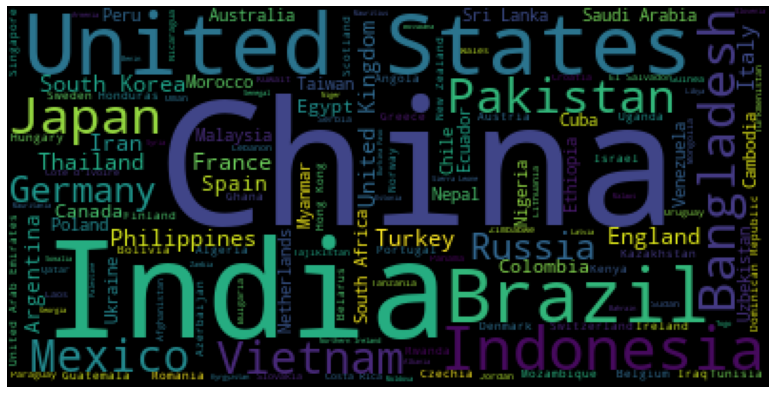

In [ ]:
from wordcloud import WordCloud
countries_total_vaccines_df = df.groupby('country') \
  .total_vaccinations.max().sort_values(ascending=False)
countries_total_vaccines = countries_total_vaccines_df \
  .to_dict() # countries and their total vaccines
print(countries_total_vaccines)

wc = WordCloud()
wc.generate_from_frequencies(countries_total_vaccines)
plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wc)
plt.show()

## Bar Plot
We can also use bar plot to show top countries with most vaccines. This plot will provide us with more details on how many vaccinations each country has so far in comparison to others.

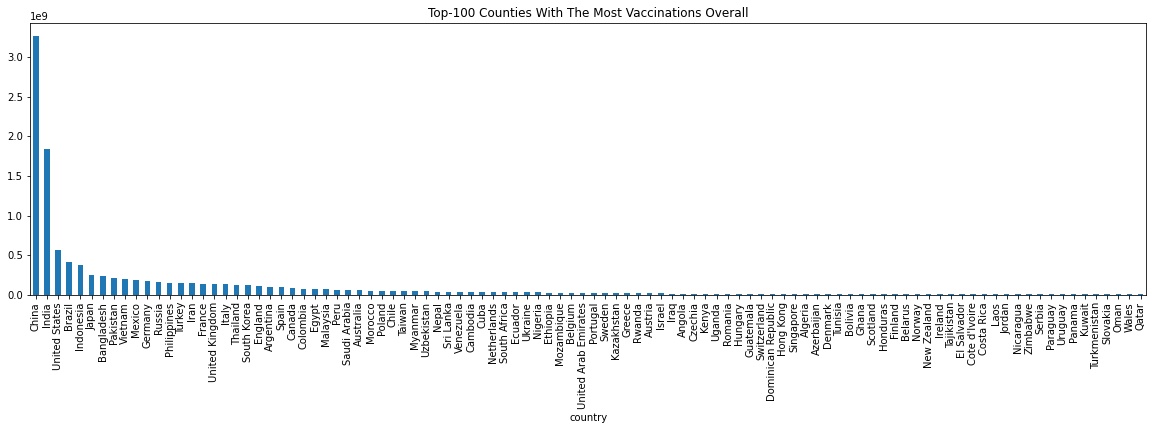

In [ ]:
ax_ = countries_total_vaccines_df.iloc[:100] \
  .plot.bar(figsize=(20,5)) # Top-100 countries
_ = ax_.set_title("Top-100 Counties With The Most Vaccinations Overall")

## Line Plot
In order to check what is the vaccination trend in each country, we are drawing the line plot where the x-axis is the date and the y-axis is the count of daily vaccination, Colours Is set to be the country.

Let's use `plotly` another useful python package for visualization.
This package will provide us with an interactive plot which you can cross-over and see more detailed information regarding individual points on the plot.

In [ ]:
import plotly.express as px
fig = px.line(df, x='date', y='daily_vaccinations', color='country')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()


As we can see, there is a mixed kind of trend among each country. Sometimes a particular country shows a positive trend and sometimes it shows a negative trend.

Now let’s analyze how many people vaccinated vs the people which are fully vaccinated in a country (EX. Germany)

We are using the graph_objects from `plotly` which uses scatter plots which has the same `stackgroup`

In [ ]:
import plotly.graph_objects as go
# df[['date','people_fully_vaccinated', 'people_vaccinated']].groupby('date').sum().plot()
country = 'Germany'
column_1 = 'people_fully_vaccinated'
column_2 = 'people_vaccinated'
so_far_df = df.query(f"country=='{country}'")[['date', column_1, column_2]] \
  .replace(to_replace=0, method='ffill').groupby('date').sum()
plot = go.Figure(data=[
            go.Scatter( 
              x = so_far_df.index, 
              y = so_far_df[column_1],
              stackgroup='one',
              name = column_1,
              marker_color= 'orange'),
            go.Scatter(
              x = so_far_df.index,
              y = so_far_df[column_2],
              stackgroup='one',
              name = column_2,
              marker_color= 'blue')
            ]) 
plot.update_layout(
    title={
            'text': f'People vaccinated vs Fully vaccinated till date in {country}',
            'y':0.95,
            'x':0.5
        },
        xaxis_title="Date"
    )
plot.show()

As we can see there are around 60M people fully vaccinated in Germany.

Now let's compare the number of fully vaccinated people between two countries (Ex. Germany vs France)

In [ ]:
country_1 = 'Germany'
country_2 = 'France'
column = 'people_fully_vaccinated'
target_countries = df.query(f"country=='{country_1}' or country=='{country_2}'")
fig = px.line(target_countries, x='date', y=column, color='country')
fig.update_layout(
    title={
            'text': f"{column} - {country_1} vs {country_2}",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title=column
)
fig.show()

As we can see both countries had rather similar pace on number of fully vaccinated people untill May 2021 then we can see that Germany moved faster but both are following same pattern.

## Maps
Now let's see how vaccinations are going in different countries using maps. The sizes are corresponding to `people_vaccinated_per_hundred` and different colors has been used for different countries.

In [ ]:
current_df = df.query(f"date == '{df.date.max()}'")
fig = px.scatter_geo(current_df, locations="iso_code",
                     color="country", # which column to use to set the color of markers
                     hover_name="country", # column added to hover information
                     size="people_vaccinated_per_hundred", # size of markers
                     projection="natural earth")
fig.show()


Let's look at the same data but in a slightly different view using `choroplethmap`

In [ ]:
px.choropleth(current_df, locations="iso_code",
                    locationmode='ISO-3',
                    color="people_vaccinated_per_hundred", 
                    hover_name="iso_code",
                    color_continuous_scale=px.colors.sequential.Blues)

Usefull links:
- https://www.analyticsvidhya.com/blog/2021/05/analyze-covid-vaccination-progress-using-python/
- https://thecleverprogrammer.com/2021/04/13/covid-19-vaccines-analysis-with-python/